In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("sales.csv")
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [4]:
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


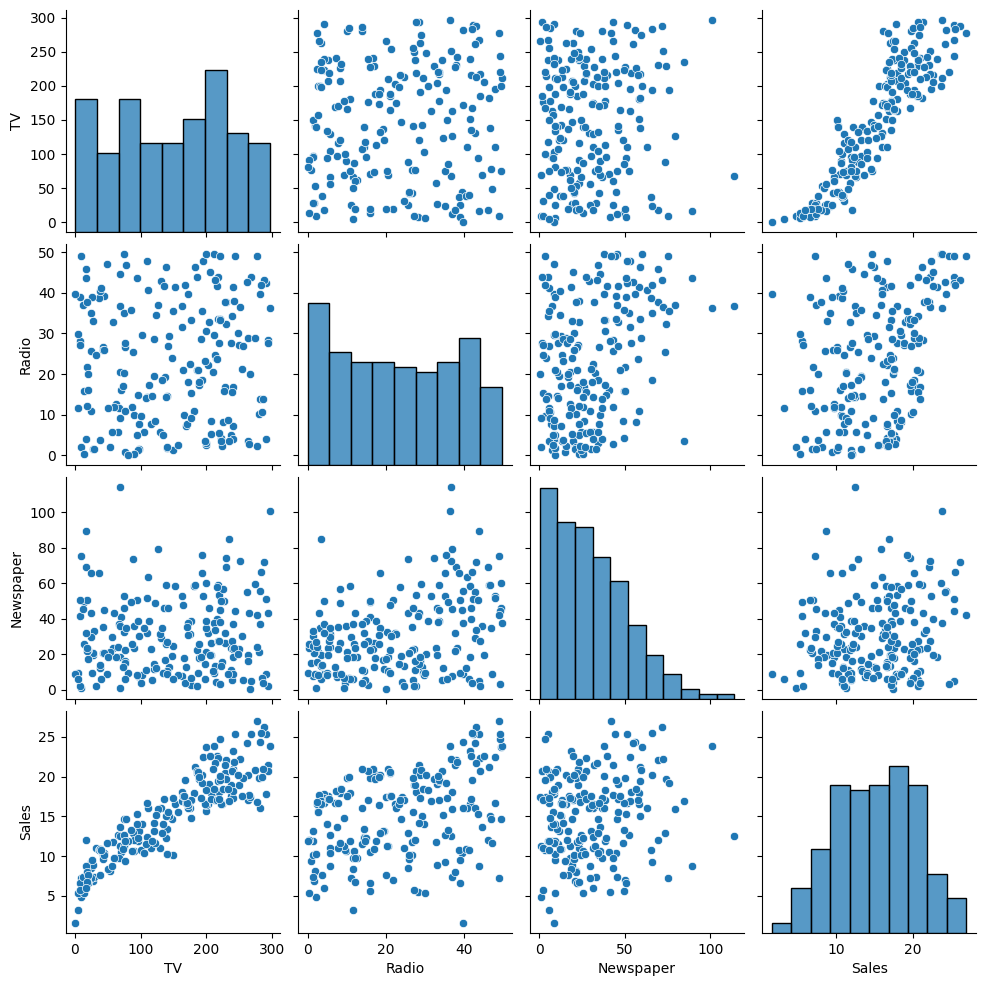

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
corr_matrix = df.corr()
print(corr_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


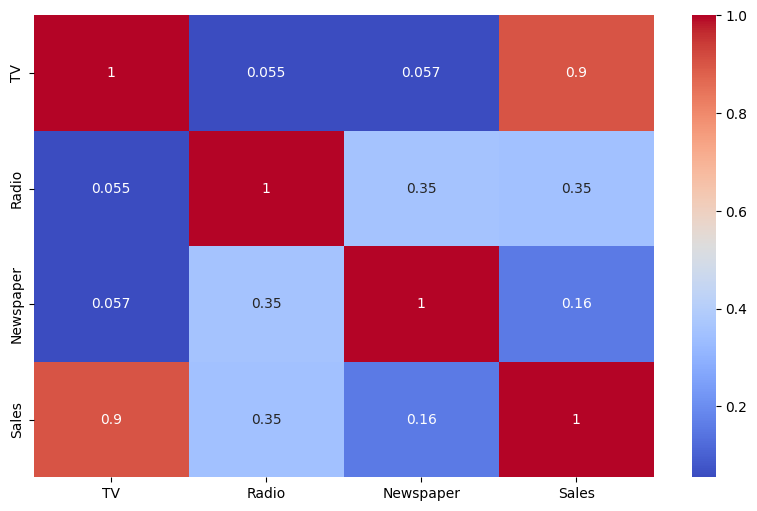

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [13]:
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R^2 Score:', r2)

Mean Squared Error: 2.9077569102710896
Root Mean Squared Error: 1.7052146229349223
R^2 Score: 0.9059011844150826


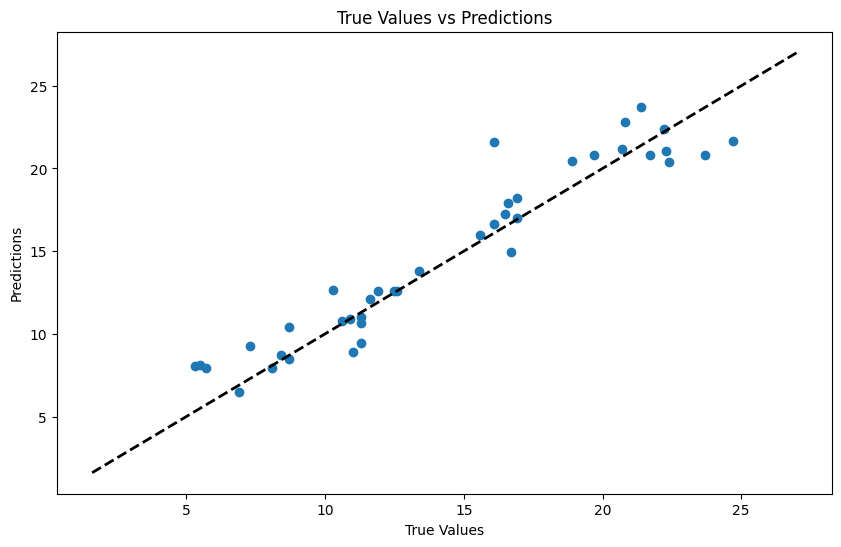

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

In [15]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337


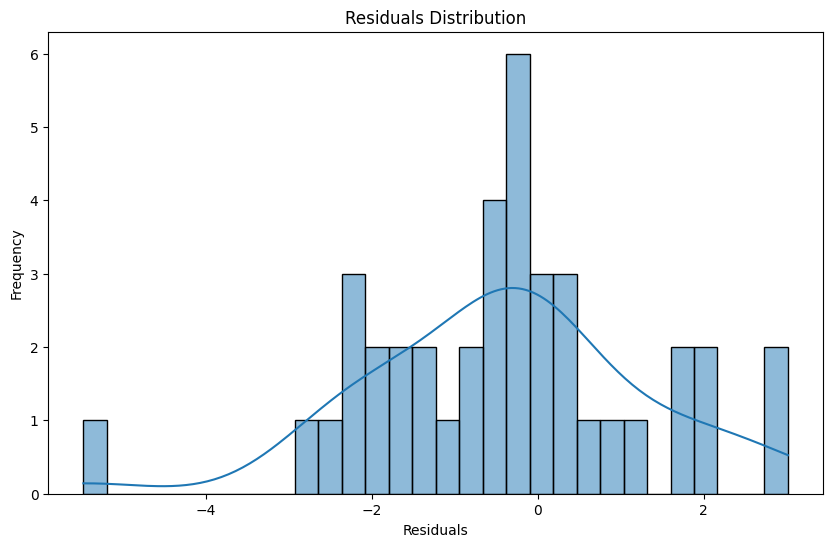

In [16]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

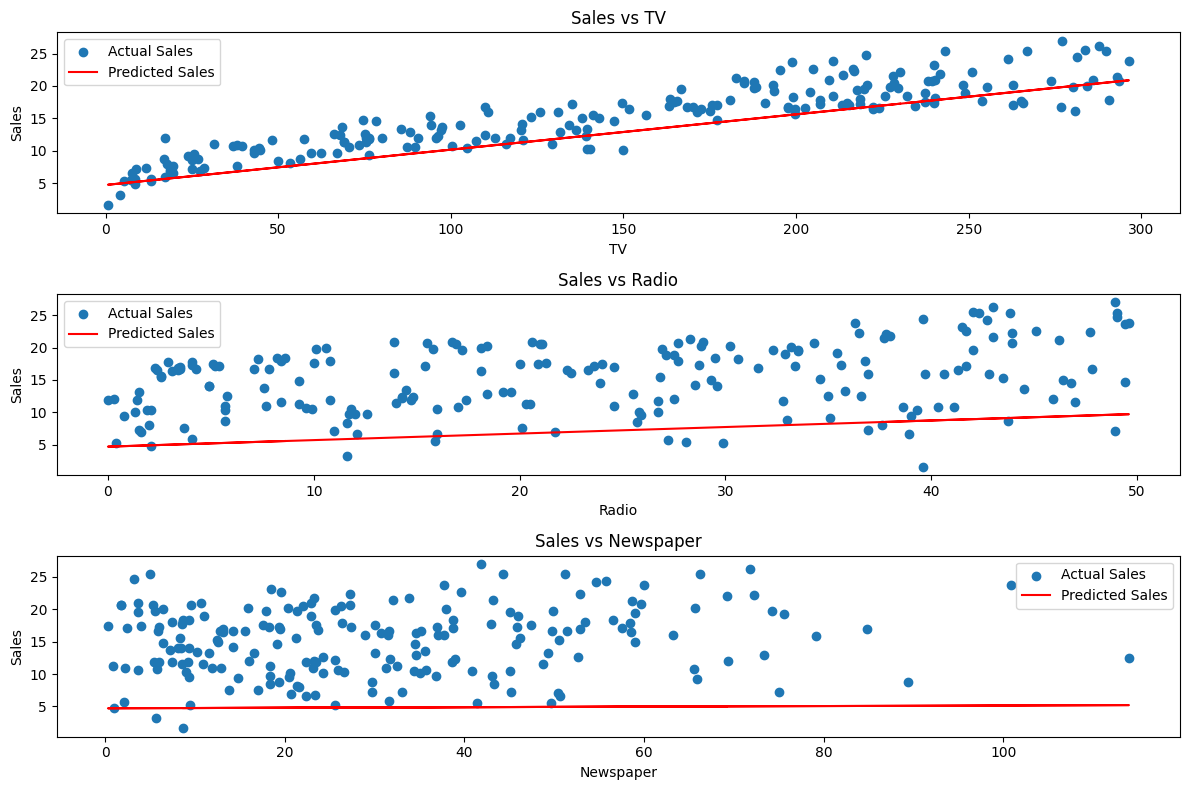

In [20]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X.columns):
    plt.subplot(3, 1, i+1)
    plt.scatter(df[col], df['Sales'], label='Actual Sales')
    
    # Create a DataFrame with only the current feature and fill others with 0
    temp_df = df.copy()
    temp_df[['TV', 'Radio', 'Newspaper']] = 0
    temp_df[col] = df[col]
    
    # Predict using the model's coefficients
    predicted_sales = model.predict(temp_df[['TV', 'Radio', 'Newspaper']])
    
    plt.plot(df[col], predicted_sales, color='red', label='Predicted Sales')
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales vs {col}')

plt.tight_layout()
plt.show()